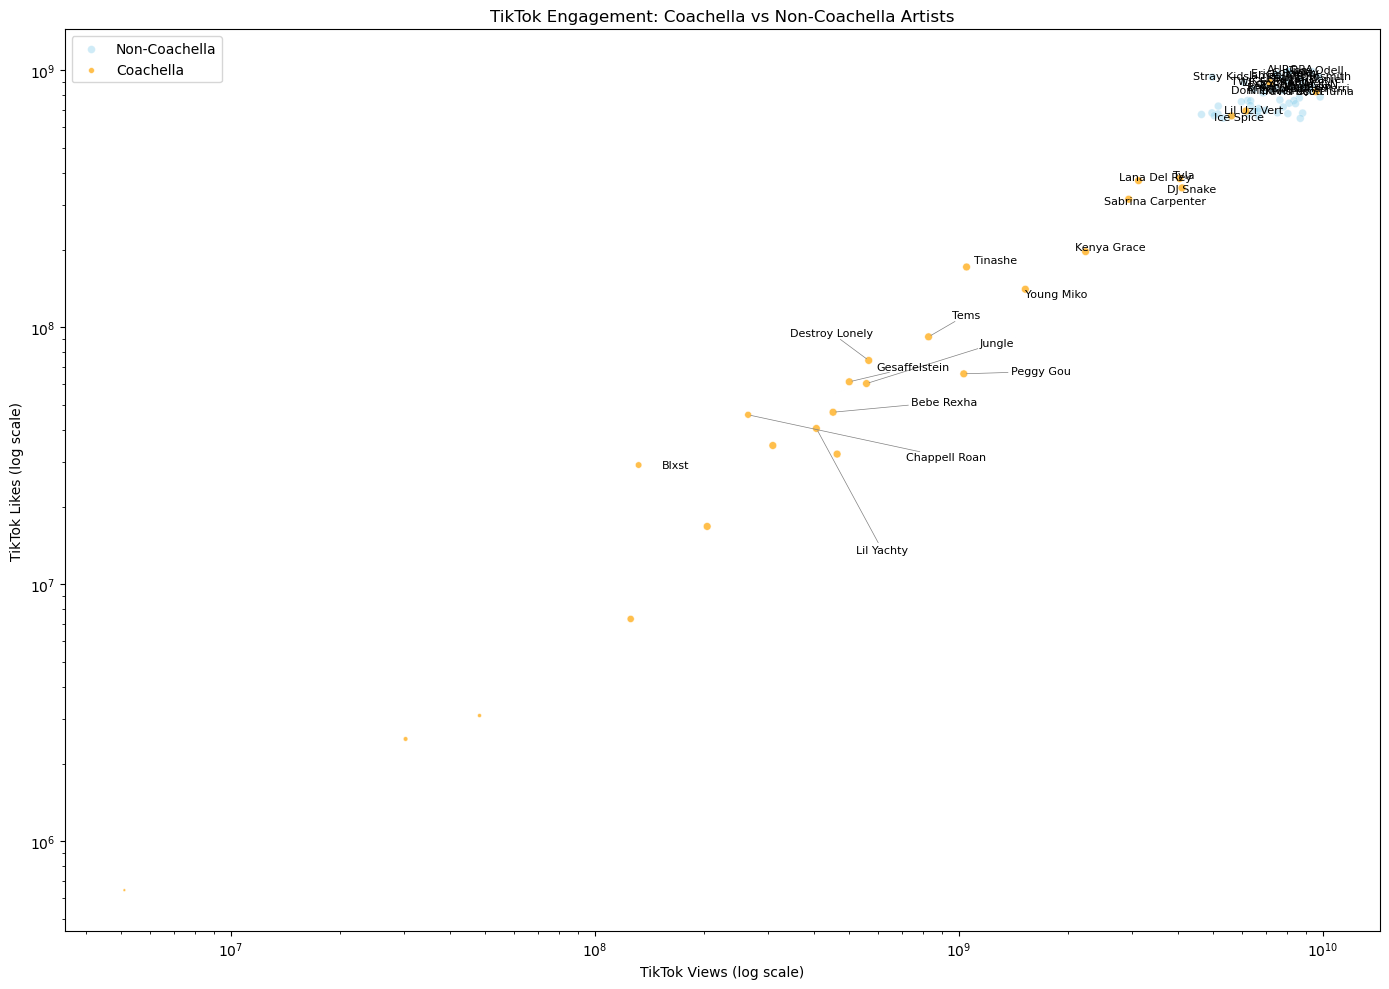

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv('Most_Streamed_Spotify_Songs_2024.csv', encoding = 'latin1')

allowed_artists = ['Lana Del Rey', 'Tyler, the Creator', 'Doja Cat', 'No Doubt', 'Peso Pluma', 'Lil Uzi Vert', 'Justice', 'Deftones',
    'Peggy Gou', 'Young Miko', 'Bizarrap', 'Skepta', 'Ken Carson', 'Faye Webster', 'Tinashe', 'Brittany Howard',
    'Chappell Roan', 'Chlöe', 'Black Country, New Road', 'Bleachers', 'Grimes', 'Jon Batiste', 'Orbital',
    'Kevin Abstract', 'The Blessed Madonna', 'Oneohtrix Point Never', 'Bar Italia', 'Erika de Casier',
    'Militarie Gun', 'Mandy, Indiana', 'Blur', 'Ice Spice', 'Sublime', 'Jungle', 'Kevin de Vries x Kölsch',
    'Kevin Kaarl', 'Khruangbin', 'Lil Yachty', 'Reneé Rapp', 'Bebe Rexha', 'Coi Leray', 'Taking Back Sunday',
    'Boy Harsher', 'Jockstrap', 'Mdou Moctar', 'Feeble Little Horse', 'Sabrina Carpenter', 'Carin León', 'ATEEZ',
    'LE SSERAFIM', 'Sublime', 'J Balvin', 'Raye', 'Rebūke', 'The Red Pears', 'Grimes', 'Suki Waterhouse',
    'Taking Back Sunday', 'Tems', 'Thuy', 'Tinashe', 'Tita Lau', 'Two Shell', 'Tyla', 'Upchuck', 'Victoria Monét',
    'Will Clarke', 'YG Marley', 'Yoasobi', 'Young Fathers', 'Young Miko', '88rising Futures', 'Adam Ten x Mita Gami',
    'The Adicts', 'Adriatique', 'Âme x Marcel Dettmann', 'Anotr', 'Anti Up', 'Anyma', 'AP Dhillon', 'The Aquabats',
    'Artbat', 'Atarashii Gakko!', 'Bar Italia', 'Barry Can’t Swim', 'Bb Trickz', 'Bebe Rexha', 'Ben Sterling',
    'The Beths', 'Bicep', 'Bizarrap', 'Black Country, New Road', 'Bleachers', 'The Blessed Madonna', 'Blond:ish',
    'Blur', 'Blxst', 'Boy Harsher', 'Brittany Howard', 'Brutalismus 3000', 'Carin León', 'Carlita', 'Chappell Roan',
    'Charlotte de Witte', 'Chlöe', 'Cimafunk', 'Cloonee', 'Clown Core', 'Coi Leray', 'Deftones', 'Depresión Sonora',
    'Destroy Lonely', 'DJ Seinfeld', 'DJ Snake', 'Dom Dolla', 'The Drums', 'Eartheater', 'Eddie Zuko', 'Eli & Fur',
    'Erika de Casier', 'Everything Always', 'Faye Webster', 'Feeble Little Horse', 'Flight Facilities', 'Flo',
    'Folamour', 'Gesaffelstein', 'Girl Ultra', 'Gorgon City', 'Grimes', 'Hatsune Miko', 'Hermanos Gutiérrez',
    'Ice Spice', 'Innellea', 'ISOxo & Knock2', 'J Balvin', 'The Japanese House', 'Jhené Aiko', 'Jjuujjuu', 'Jockstrap',
    'John Summit', 'Jon Batiste', 'Joplyn', 'Jungle', 'Justice', 'Ken Carson', 'Kenya Grace', 'Kevin Abstract',
    'Kevin de Vries x Kölsch', 'Kevin Kaarl', 'Keyspan', 'Khruangbin', 'Kimonos', 'Kokoroko', 'Lana Del Rey',
    'The Last Dinner Party', 'Late Night Drive Home', 'Latin Mafia', 'Le Sserafim', 'Lil Uzi Vert', 'Lil Yachty',
    'L’Impératrice', 'Lovejoy', 'Ludmilla', 'Mahmut Orhan', 'Mall Grab', 'Mandy, Indiana', 'Maz', 'Mdou Moctar',
    'Militarie Gun', 'Miss Monique', 'Narrow Head', 'Nav', 'Neil Frances', 'Olivia Dean', 'Oneohtrix Point Never',
    'Orbital', 'Palace', 'Patrick Mason', 'Peggy Gou', 'Peso Pluma', 'Purple Disco Machine', 'Rainer Zonneveld',
    'Raye', 'Rebūke', 'The Red Pears', 'Reneé Rapp', 'The Rose', 'Sabrina Carpenter', 'Saint Levant', 'Santa Fe Klan',
    'Sid Sriram', 'Skepta', 'Skin on Skin', 'Skream & Benga', 'Son Rompe Pera', 'Spinall', 'Steve Angello', 'Sublime',
    'Suki Waterhouse', 'Taking Back Sunday', 'Tems', 'Thuy', 'Tinashe', 'Tita Lau', 'Two Shell', 'Tyla',
    'Tyler, the Creator', 'Upchuck', 'Victoria Monét', 'Will Clarke', 'YG Marley', 'Yoasobi', 'Young Fathers',
    'Young Miko', '88rising Futures']


for col in ['TikTok Posts', 'TikTok Views', 'TikTok Likes']:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

df = df.dropna(subset=['TikTok Posts', 'TikTok Views', 'TikTok Likes'])
df = df[df['TikTok Likes'] != 0]


df_coachella = df[df['Artist'].isin(allowed_artists)]
df_non_coachella = df[~df['Artist'].isin(allowed_artists)]

artist_df_coachella = df_coachella.groupby('Artist', as_index=False).agg({
    'TikTok Posts': 'sum',
    'TikTok Views': 'sum',
    'TikTok Likes': 'sum'
})

artist_df_non_coachella = df_non_coachella.groupby('Artist', as_index=False).agg({
    'TikTok Posts': 'sum',
    'TikTok Views': 'sum',
    'TikTok Likes': 'sum'
})

MAX_VIEWS = 1e10
MAX_LIKES = 1e9

artist_df_coachella = artist_df_coachella[(artist_df_coachella['TikTok Views'] < MAX_VIEWS) & 
                                          (artist_df_coachella['TikTok Likes'] < MAX_LIKES)]

artist_df_non_coachella = artist_df_non_coachella[(artist_df_non_coachella['TikTok Views'] < MAX_VIEWS) & 
                                                  (artist_df_non_coachella['TikTok Likes'] < MAX_LIKES)]

artist_df_coachella = artist_df_coachella.dropna(subset=['TikTok Posts', 'TikTok Views', 'TikTok Likes'])

artist_df_coachella['Size'] = np.sqrt(artist_df_coachella['TikTok Posts'].clip(upper=100000)) / 10
artist_df_non_coachella['Size'] = np.sqrt(artist_df_non_coachella['TikTok Posts'].clip(upper=100000)) / 10

artist_df_coachella = artist_df_coachella.sort_values('TikTok Likes', ascending=False).head(50)
artist_df_non_coachella = artist_df_non_coachella.sort_values('TikTok Likes', ascending=False).head(50)

plt.figure(figsize=(14, 10))

# Plot non-Coachella in blue
plt.scatter(artist_df_non_coachella['TikTok Views'], artist_df_non_coachella['TikTok Likes'],
            s=artist_df_non_coachella['Size'],
            alpha=0.4, c='skyblue', edgecolors='w', linewidth=0.5, label='Non-Coachella')

# Plot Coachella in orange
plt.scatter(artist_df_coachella['TikTok Views'], artist_df_coachella['TikTok Likes'],
            s=artist_df_coachella['Size'],
            alpha=0.7, c='orange', edgecolors='w', linewidth=0.5, label='Coachella')

# Label top 50 Coachella artists by TikTok Likes
top_liked = artist_df_coachella.sort_values('TikTok Likes', ascending=False).head(20)
texts = []
for i, row in top_liked.iterrows():
    texts.append(plt.text(row['TikTok Views'], row['TikTok Likes'], row['Artist'], fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

top_liked = artist_df_non_coachella.sort_values('TikTok Likes', ascending=False).head(20)
texts = []
for i, row in top_liked.iterrows():
    texts.append(plt.text(row['TikTok Views'], row['TikTok Likes'], row['Artist'], fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Axes
plt.xscale('log')
plt.yscale('log')
plt.xlabel('TikTok Views (log scale)')
plt.ylabel('TikTok Likes (log scale)')
plt.title('TikTok Engagement: Coachella vs Non-Coachella Artists')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()